<a href="https://colab.research.google.com/github/dev-sayantan/MainCrafts-Technology-Data-Science-Internship/blob/main/Unveiling_titanic_survival_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<u>Data Science with Python Internship Task 2 - Unveiling Titanic Survival Patterns</u>**


---



### **<u>REQUIRED LIBRARY IMPORTS</u>**

In [6]:
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns # For statistical data visualization

from matplotlib import style # To set the style of the plots
style.use('ggplot') # Using the 'ggplot' style

import warnings # To manage warnings
warnings.filterwarnings('ignore') # Ignoring warnings for cleaner output
# To display plots directly in the notebook
%matplotlib inline

### **<u>READ KAGGLE DATASET, RUN & VIEW</u>**

##### **1. Load and View Data**

In [7]:
file_path = '/content/drive/MyDrive/Colab Notebooks/MainCrafts_Technology_DataSc_Internship_Tasks/Datasets/titanic3.xls'
titanic3 = pd.read_excel(file_path)

In [8]:
# Displaying the entire DataFrame to get an initial view of the data.
titanic3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [9]:
# Checking the columns present in titanic3 dataset
titanic3.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [10]:
# Checking the associated datatype of each column of titanic3 dataset
titanic3.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


### **<u>CLEAN DATASET</u>**

In [11]:
# Checking no. of unique values along a specific axis. Here, along the index or axis=0 means checking missing values along index, or down each column of the DataFrame, by operating on rows.
# This helps identify columns with a large number of unique values or potentially many missing values.
titanic3.nunique(axis=0)

,0
pclass,3
survived,2
name,1307
sex,2
age,98
sibsp,7
parch,8
ticket,939
fare,281
cabin,186


In [12]:
# Checking for unique observations under a few categorical data columns
# This helps understand the distinct categories present in these columns.
print("Survived -->", titanic3.survived.unique())
print("Sex -->", titanic3.sex.unique())
print("Embarked -->", titanic3.embarked.unique())
print("Pclass -->", titanic3.pclass.unique())

Survived --> [1 0]
Sex --> ['female' 'male']
Embarked --> ['S' 'C' nan 'Q']
Pclass --> [1 2 3]


In [13]:
# Checking if duplicate values exists or not..
# The sum of duplicated rows indicates the number of duplicate entries in the dataset.
titanic3.duplicated().sum()

np.int64(0)

#### **<u>Detailed Imputation pipeline required to clean the entire dataset, filling in missing values with estimated substitute values, rather than deleting rows or columns</u>**

In [14]:
# --- Imputation Imports ---
from sklearn.experimental import enable_iterative_imputer # Importing experimental module for IterativeImputer
from sklearn.impute import IterativeImputer # Importing IterativeImputer
# i) This is the regressor for the IMPUTER
from sklearn.ensemble import HistGradientBoostingRegressor # Importing HistGradientBoostingRegressor as the estimator for imputation

# --- Model Imports ---
# ii) This is the separate MODEL
from sklearn.ensemble import RandomForestClassifier # Importing RandomForestClassifier for later use
from sklearn.model_selection import train_test_split # Importing train_test_split for model evaluation

# --- 1. Pre-processing ---
# Creating a copy to work on, leaving the original 'titanic3' unchanged.
# Dropping columns that are irrelevant or have too many missing values.
titanic3_processed = titanic3.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

# Convert categorical columns to numbers (one-hot encoding)
# The imputer needs all-numeric data to work
# 'drop_first=True' avoids multicollinearity(which is about the independent variables that are highly correlated with each other)
titanic3_processed = pd.get_dummies(titanic3_processed, columns=['sex', 'embarked'], drop_first=True)

# Keep the column names for later
original_columns = titanic3_processed.columns

# Checking Missing Values BEFORE Imputation
print("Missing values BEFORE imputation:")
print(titanic3.isnull().sum())
print("-" * 40 + "\n")

# --- 2. Set up the Imputer ---
# This is the regressor that will be plugged in
# Use the regressor that can handle NaNs
hgb_regressor = HistGradientBoostingRegressor(random_state=42)

# Initialize IterativeImputer
imputer = IterativeImputer(
  estimator=hgb_regressor, # Using HistGradientBoostingRegressor as the estimator
  max_iter=10,        # Number of imputation rounds
  random_state=42,
  initial_strategy='median' # Start by filling with median
)

# --- 3. Fit and Transform ---
print("Starting imputation -> (using HistGradientBoostingRegressor)...")
# This step trains the models and fills the missing values in 'age' and 'fare'
titanic3_imputed_array = imputer.fit_transform(titanic3_processed)
print("Imputation complete.\n")

# --- 4. Convert Back to DataFrame ---
# The imputer returns a NumPy array, so let's convert it back
titanic3_imputed = pd.DataFrame(titanic3_imputed_array,
columns=original_columns)
# Perform rounding for age and the one-hot encoded columns to make them integers
titanic3_imputed['age'] = np.round(titanic3_imputed['age'])
for col in ['sex_male', 'embarked_Q', 'embarked_S']:
    if col in titanic3_imputed.columns:
        titanic3_imputed[col] = np.round(titanic3_imputed[col]).astype(int)

# --- 5. VERIFY THE FIX ---
print("\n--- Missing values AFTER imputation ---")
# This check will now show all ZEROs, confirming successful imputation
print(titanic3_imputed.isnull().sum())
print("-" * 40)

# --- 6. Training the Model ---
print("Training RandomForestClassifier model...")
# Separating features (X) and target (y)
X = titanic3_imputed.drop('survived', axis=1)
y = titanic3_imputed['survived'].astype(int) # Ensure target is integer

# Let's do a train-test split to evaluate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing and training a RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
print("Model training successful!")
# Evaluating the model on the test set and printing the accuracy
print(f"Model accuracy on test set: {rf_classifier.score(X_test, y_test):.4f}")

# --- 6. Check Final Results ---
# This is the "AFTER" state, which should show all zeros
print("--- Missing Values AFTER Imputation ---")
print(titanic3_imputed.isnull().sum())
print("-" * 40 + "\n")

print("DataFrame Head (after imputation):")
print(titanic3_imputed.head())

Missing values BEFORE imputation:
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
----------------------------------------

Starting imputation -> (using HistGradientBoostingRegressor)...
Imputation complete.


--- Missing values AFTER imputation ---
pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
----------------------------------------
Training RandomForestClassifier model...
Model training successful!
Model accuracy on test set: 0.8092
--- Missing Values AFTER Imputation ---
pclass        0
survived      0
age           0
sibsp         0
parch         0
fare          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64
----------------------------------

### **<u>DESCRIPTIVE STATISTICS</u>**

In [15]:
# Generating descriptive statistics for the numerical columns of the imputed DataFrame.
titanic3_imputed.describe()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.821238,0.498854,0.385027,33.277846,0.644003,0.093965,0.698243
std,0.837836,0.486055,13.389603,1.041658,0.865560,51.742812,0.478997,0.291891,0.459196
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [16]:
# Displaying information about the DataFrame, including the data types and non-null counts of each column.
titanic3_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   float64
 1   survived    1309 non-null   float64
 2   age         1309 non-null   float64
 3   sibsp       1309 non-null   float64
 4   parch       1309 non-null   float64
 5   fare        1309 non-null   float64
 6   sex_male    1309 non-null   int64  
 7   embarked_Q  1309 non-null   int64  
 8   embarked_S  1309 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 92.2 KB


In [17]:
# Displaying the first 10 rows of the imputed DataFrame to get a glimpse of the data after cleaning.
titanic3_imputed.head(10)

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,1.0,29.0,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,1.0,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0,1.0,2.0,151.5500,0,0,1
5,1.0,1.0,48.0,0.0,0.0,26.5500,1,0,1
6,1.0,1.0,63.0,1.0,0.0,77.9583,0,0,1
7,1.0,0.0,39.0,0.0,0.0,0.0000,1,0,1
8,1.0,1.0,53.0,2.0,0.0,51.4792,0,0,1
9,1.0,0.0,71.0,0.0,0.0,49.5042,1,0,0


##### VIEWING THE WHOLE CLEANED DATASET

In [18]:
# Displaying the entire imputed DataFrame.
titanic3_imputed

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,1.0,29.0,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,1.0,1.0,2.0,151.5500,1,0,1
2,1.0,0.0,2.0,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,30.0,1.0,2.0,151.5500,1,0,1
4,1.0,0.0,25.0,1.0,2.0,151.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.0,1.0,0.0,14.4542,0,0,0
1305,3.0,0.0,21.0,1.0,0.0,14.4542,0,0,0
1306,3.0,0.0,26.0,0.0,0.0,7.2250,1,0,0
1307,3.0,0.0,27.0,0.0,0.0,7.2250,1,0,0


### **<u>ANALYTICAL QUESTIONS</u>**

#### Who survived more: males or females?

In [19]:
# Isolating the 'survived' and 'sex_male' columns.
survived_mf = titanic3_imputed.survived
all_mf = titanic3_imputed.sex_male

# Concatenating the two columns into a new DataFrame for easier analysis.
df_survived_mf = pd.concat([all_mf,survived_mf],axis=1)
print("DataFrame with sex and survival information:")
print(df_survived_mf)

# Grouping by 'sex_male' (0 for female, 1 for male) and summing the 'survived' column to get survival counts for each gender.
df_survival_counts = df_survived_mf.groupby('sex_male')['survived'].sum().astype(int)
print("\nSurvival counts by gender (0: Female, 1: Male):")
print(df_survival_counts)

# Calculating the total number of passengers who survived.
total_passengers_survived = df_survival_counts.iloc[0] + df_survival_counts.iloc[1]
print("\nTotal Passengers Survived -->",total_passengers_survived)
# Printing the survival counts for male and female passengers.
print(f"Total Male passengers survived out of {int(total_passengers_survived)} passengers are -->", int(df_survival_counts.loc[1]))
print(f"Total Female passengers survived out of {int(total_passengers_survived)} passengers are -->", int(df_survival_counts.loc[0]))

# Displaying the survival counts by gender.
df_survival_counts

DataFrame with sex and survival information:
      sex_male  survived
0            0       1.0
1            1       1.0
2            0       0.0
3            1       0.0
4            0       0.0
...        ...       ...
1304         0       0.0
1305         0       0.0
1306         1       0.0
1307         1       0.0
1308         1       0.0

[1309 rows x 2 columns]

Survival counts by gender (0: Female, 1: Male):
sex_male
0    339
1    161
Name: survived, dtype: int64

Total Passengers Survived --> 500
Total Male passengers survived out of 500 passengers are --> 161
Total Female passengers survived out of 500 passengers are --> 339


,survived
sex_male,
0,339
1,161


#### Did passenger class affect survival chances?

In [20]:
# Group by 'pclass' and get the mean of the 'survived' column, then turn it into a DataFrame.
# The mean of 'survived' for each class represents the survival rate for that class.
df_survival_rate_by_pclass = titanic3_imputed.groupby('pclass')['survived'].mean().to_frame()
print("Survival rate by passenger class:")
print(df_survival_rate_by_pclass)

# 'pclass' is the index. Making it a regular column.
df_survival_rate_by_pclass = df_survival_rate_by_pclass.reset_index()
df_survival_rate_by_pclass
# Now, renaming the columns from 'pclass' and 'survived' to desired names as follows
df_survival_rate_by_pclass = df_survival_rate_by_pclass.rename(columns={'pclass':'passenger_Class','survived':'survival_Rate'})
# Convert 'Passenger Class' to integer for cleaner display
df_survival_rate_by_pclass['passenger_Class'] = df_survival_rate_by_pclass['passenger_Class'].astype(int)
df_survival_rate_by_pclass

Survival rate by passenger class:
        survived
pclass          
1.0     0.619195
2.0     0.429603
3.0     0.255289


,passenger_Class,survival_Rate
0,1,0.619195
1,2,0.429603
2,3,0.255289


#### What was the survival rate by age group?

In [21]:
# Displaying the columns of the imputed DataFrame to confirm the 'age' column is present.
titanic3_imputed.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [22]:
# Displaying information about the 'age' column, including its data type and non-null count.
titanic3_imputed.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: age
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [23]:
# Generating descriptive statistics for the 'age' column to understand its distribution.
titanic3_imputed.age.describe()

,age
count,1309.000000
mean,29.821238
std,13.389603
min,0.000000
25%,21.000000
50%,28.000000
75%,38.000000
max,80.000000


In [24]:
# Defining the age bins or age brackets and then set their labels
# Making groups for 0-11, 12-17, 18-34, 35-59, and 60+
print("Maximum age for passengers -->",titanic3_imputed['age'].max(),"\n")
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child (0-11)', 'Teen (12-17)', 'Young Adult (18-34)', 'Adult (35-59)', 'Elderly (60-80)']

print("--"*40)

# Creating a new 'AgeGroup' column
# pd.cut neatly places each passenger's age into one of the bins
# 'right=False' means 12 is in 'Teen', not 'Child'
titanic3_imputed['ageGroup'] = pd.cut(titanic3_imputed['age'], bins=age_bins,
                                    labels=age_labels, right=False)
print(titanic3_imputed)

print("--"*40)

# Grouped by the new 'ageGroup' and finding the average survival
# The mean of 'survived' for each age group represents the survival rate for that group.
age_survival_rate = titanic3_imputed.groupby('ageGroup')['survived'].mean()

# Converting the Pandas Series "age_survival_rate" to a DataFrame for clean printing
df_age_survival = age_survival_rate.to_frame(name='survivalRate')

# Resetting the index to make 'ageGroup' a column, because "df_age_survival" was a Pandas Series where the only column is "survivalRate"
df_age_survival = df_age_survival.reset_index()
# Displaying the survival rate by age group.
print("Survival Rate by Age Groups:\n", df_age_survival)

Maximum age for passengers --> 80.0 

--------------------------------------------------------------------------------
      pclass  survived   age  sibsp  parch      fare  sex_male  embarked_Q  \
0        1.0       1.0  29.0    0.0    0.0  211.3375         0           0   
1        1.0       1.0   1.0    1.0    2.0  151.5500         1           0   
2        1.0       0.0   2.0    1.0    2.0  151.5500         0           0   
3        1.0       0.0  30.0    1.0    2.0  151.5500         1           0   
4        1.0       0.0  25.0    1.0    2.0  151.5500         0           0   
...      ...       ...   ...    ...    ...       ...       ...         ...   
1304     3.0       0.0  14.0    1.0    0.0   14.4542         0           0   
1305     3.0       0.0  21.0    1.0    0.0   14.4542         0           0   
1306     3.0       0.0  26.0    0.0    0.0    7.2250         1           0   
1307     3.0       0.0  27.0    0.0    0.0    7.2250         1           0   
1308     3.0       0.0 

### **<u>VISUALIZATION USING Python LIBRARIES - MATPLOTLIB & SEABORN**</u>

#### Bar chart of survival by gender

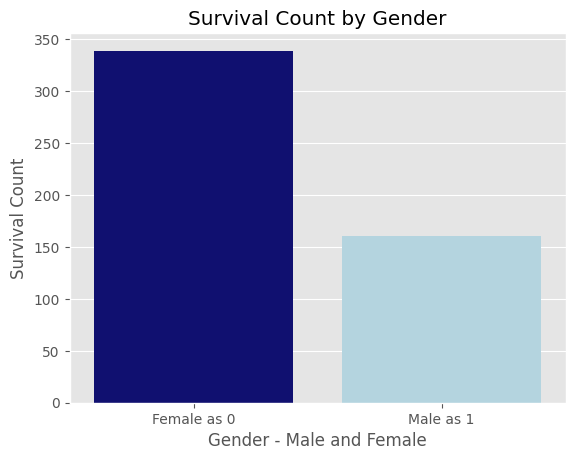

In [25]:
# Getting the survival counts for male and female passengers.
survived_male = int(df_survival_counts.loc[1])
survived_female = int(df_survival_counts.loc[0])

# Utilization of SEABORN barplot to display gender-wise survival count
# Creates a bar plot showing the number of survivors for each gender.
ax = sns.barplot(data=df_survival_counts,palette=['navy','lightblue'])
ax.set_xlabel("Gender - Male and Female") # Setting the x-axis label
ax.set_ylabel("Survival Count") # Setting the y-axis label
ax.set_title("Survival Count by Gender") # Setting the title of the plot
ax.set_xticklabels(['Female as 0','Male as 1']) # Setting the x-axis tick labels
plt.show() # Displaying the plot

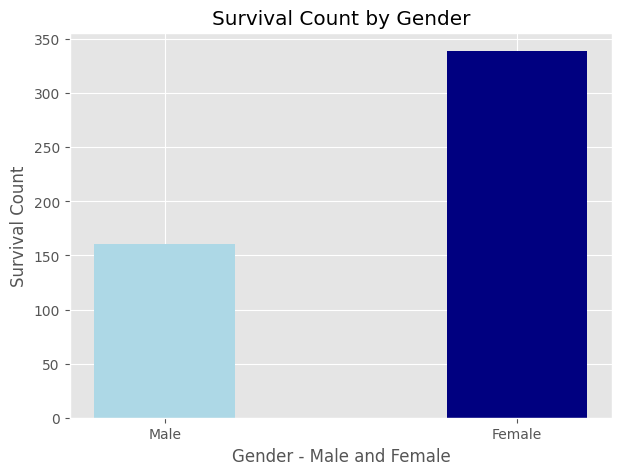

In [26]:
# Utilizing Matplotlib barplot visualization to display gender-wise survival count
# Creates a bar plot showing the number of survivors for each gender using Matplotlib.
plt.figure(figsize=(7,5)) # Setting the figure size
plt.title("Survival Count by Gender") # Setting the title of the plot
plt.xlabel("Gender - Male and Female") # Setting the x-axis label
plt.ylabel("Survival Count") # Setting the y-axis label
# Creating the bar plot with specified data, labels, height, width, and colors.
plt.bar(data=df_survival_counts,x=['Male','Female'],height=[survived_male,survived_female],width=0.4,color=['lightblue','navy'])
plt.show() # Displaying the plot

#### Bar chart of survival by class.


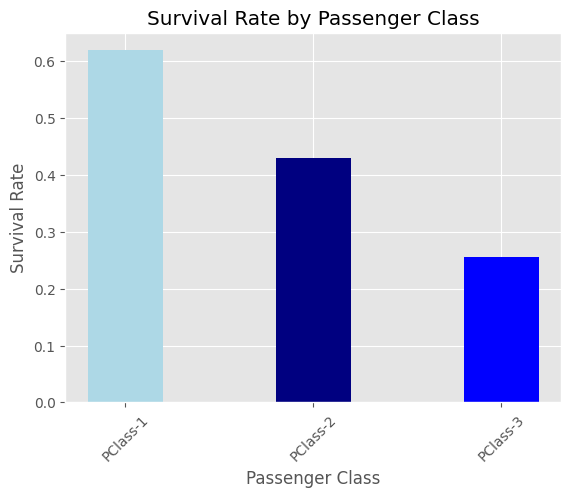

In [27]:
# Utilizing Matplotlib bar visualization to display survival rate of all Passenger Classes

# Displaying the column names of the DataFrame containing survival rate by class.
df_survival_rate_by_pclass.columns

# Creating a bar plot showing the survival rate for each passenger class.
plt.bar(data=df_survival_rate_by_pclass,x=['PClass-1','PClass-2','PClass-3'],height=df_survival_rate_by_pclass['survival_Rate'],width=0.4,color=['lightblue','navy','blue'])
plt.title("Survival Rate by Passenger Class") # Setting the title of the plot
plt.xlabel("Passenger Class") # Setting the x-axis label
plt.ylabel("Survival Rate") # Setting the y-axis label
plt.xticks(rotation=45) # Rotating the x-axis labels for better readability
plt.show() # Displaying the plot

      pclass  survived   age  sibsp  parch      fare  sex_male  embarked_Q  \
0        1.0       1.0  29.0    0.0    0.0  211.3375         0           0   
1        1.0       1.0   1.0    1.0    2.0  151.5500         1           0   
2        1.0       0.0   2.0    1.0    2.0  151.5500         0           0   
3        1.0       0.0  30.0    1.0    2.0  151.5500         1           0   
4        1.0       0.0  25.0    1.0    2.0  151.5500         0           0   
...      ...       ...   ...    ...    ...       ...       ...         ...   
1304     3.0       0.0  14.0    1.0    0.0   14.4542         0           0   
1305     3.0       0.0  21.0    1.0    0.0   14.4542         0           0   
1306     3.0       0.0  26.0    0.0    0.0    7.2250         1           0   
1307     3.0       0.0  27.0    0.0    0.0    7.2250         1           0   
1308     3.0       0.0  29.0    0.0    0.0    7.8750         1           0   

      embarked_S             ageGroup  
0              1  Young

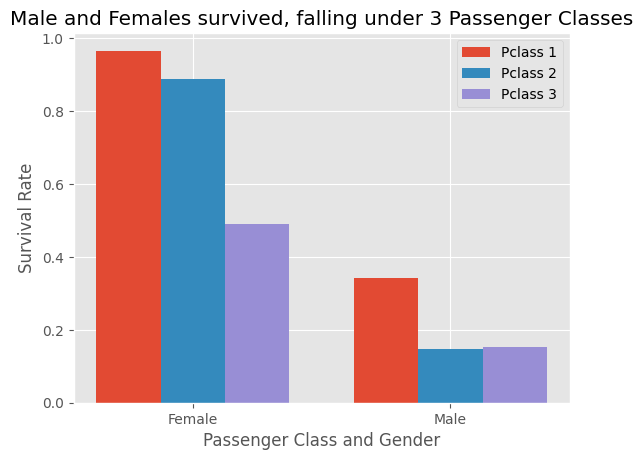

In [28]:
# <============ Creating a better barplot visualization to effectively understand passenger's survival rate by each passenger class, for each gender group ============>
print(titanic3_imputed)

# Aggregating Data -->
# We need the mean survival rate grouped by 'sex_male' (0=Female, 1=Male) & 'pclass'(1,2,3).
# .unstack() moves the 'pclass' index to be columns, which is perfect for plotting.
grouped_data = titanic3_imputed.groupby(['sex_male', 'pclass'])['survived'].mean().unstack()
print(grouped_data)

print('--'*40)

# Setting Up Plot -->
# Get the means for each class
pclass1_means = grouped_data[1].values
pclass2_means = grouped_data[2].values
pclass3_means = grouped_data[3].values
print(len(pclass1_means))
# Defining x-axis positions for the groups (0 for Female, 1 for Male)
group_positions = np.arange(len(pclass1_means))
# This will be [0, 1]
print(group_positions)
# Setting the width of each individual bar
bar_width = 0.25
# Having 3 bars per group (pclass 1, 2, 3)
n_groups = 3

# Creating the figure and axes objects
fig, ax = plt.subplots()

# Plotting Bars --> Plotting each passenger class bar set separately, applying an offset to group_positions so they don't overlap.
print(group_positions - bar_width, group_positions, group_positions + bar_width)

# Pclass 1 bars (at position - bar_width)
bar1 = ax.bar(
    group_positions - bar_width,
    pclass1_means,
    bar_width,
    label='Pclass 1'
)
# Pclass 2 bars (at position 0)
bar2 = ax.bar(
    group_positions,
    pclass2_means,
    bar_width,
    label='Pclass 2'
)
# Pclass 3 bars (at position + bar_width)
bar3 = ax.bar(
    group_positions + bar_width,
    pclass3_means,
    bar_width,
    label='Pclass 3'
)

# Add Labels -->
# Setting the x-axis label
ax.set_xlabel("Passenger Class and Gender")

# Setting the y-axis label
ax.set_ylabel("Survival Rate")

# Setting the title of the plot
ax.set_title("Male and Females survived, falling under 3 Passenger Classes")

# Setting ticklabels on x-axis
# Setting the ticks to be at the center of the groups (0 and 1)
ax.set_xticks(group_positions)
ax.set_xticklabels(["Female", "Male"])

# Adding a legend to identify the passenger classes
ax.legend()

# Displaying the plot
plt.show()

#### Histogram of passenger ages

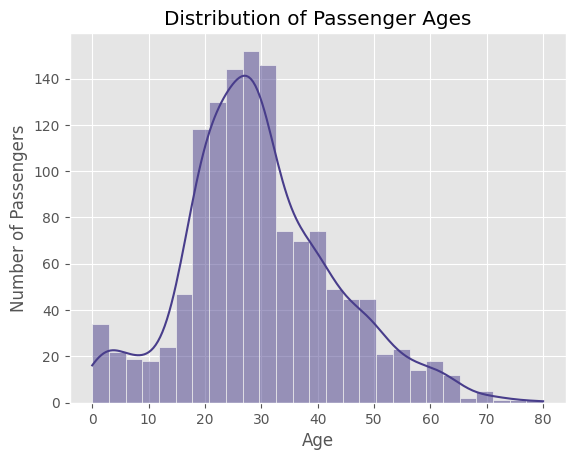

----------------------------------------------------------------------------------------------------


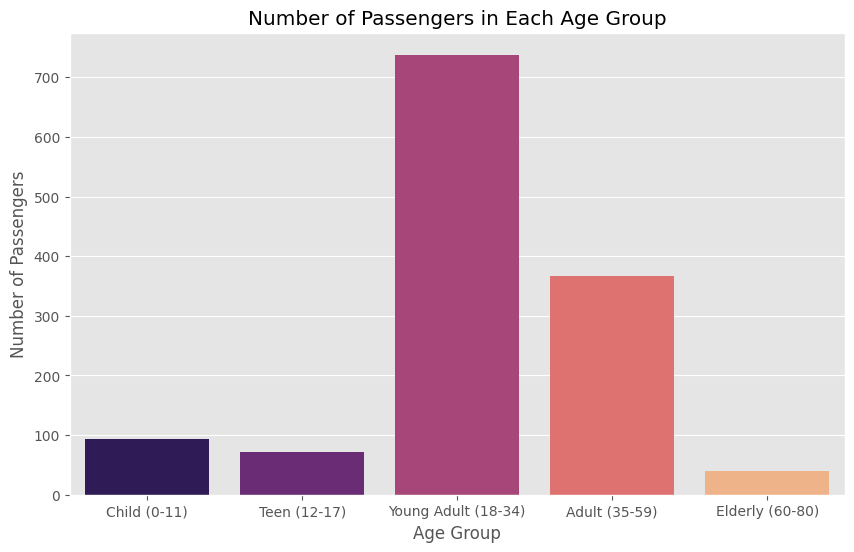

In [29]:
# Creating the histogram to distribute ages of passengers across age groups
sns.histplot(data=titanic3_imputed,
             x='age',
             binwidth=3,
             kde=True,
             color='darkslateblue')

# Setting Labels and Title
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

# Displaying the plot
plt.show()

print("--"*50)

# To create a BAR CHART of the categorical 'ageGroup'
# To Make the plot wider for labels
plt.figure(figsize=(10, 6))

# countplot is designed for categorical data like 'ageGroup'
sns.countplot(data=titanic3_imputed, x='ageGroup',palette='magma') # palette works well here
plt.title("Number of Passengers in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")

plt.show()

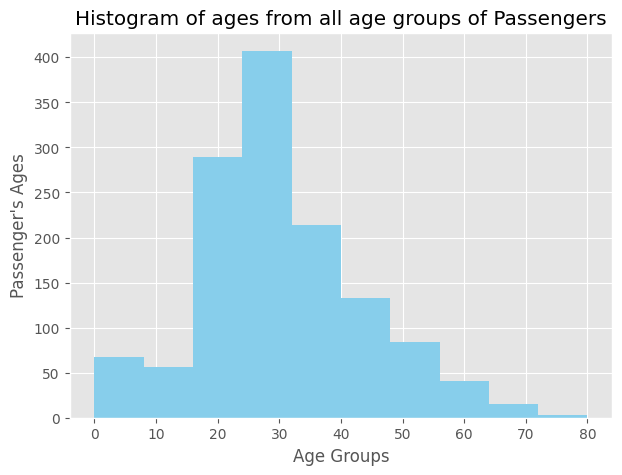

In [30]:
# Utilizing Matplotlib Histogram visualization to display ages from all age groups of Passengers
# Creates a histogram showing the distribution of passenger ages using Matplotlib.
plt.figure(figsize=(7,5)) # Setting the figure size
plt.hist(x=titanic3_imputed['age'],bins=10,histtype='stepfilled',color='skyblue')
plt.title("Histogram of ages from all age groups of Passengers") # Setting the title of the plot
plt.xlabel("Age Groups") # Setting the x-axis label
plt.ylabel("Passenger's Ages") # Setting the y-axis label
plt.xticks() # Setting the x-axis ticks (Matplotlib automatically determines appropriate ticks)
plt.show() # Displaying the plot

### Analysis Summary: Unveiling Titanic Survival Patterns

Based on analysis:

*   **Gender played a significant role in survival:** Females had a much higher survival rate than males.
*   **Passenger class was a strong indicator of survival:** First-class passengers had the highest survival rate, followed by second and then third class.
*   **Age also influenced survival:** Younger passengers, particularly children, had a higher chance of survival compared to other age groups.

These findings highlight the stark realities of the Titanic disaster, where factors like gender, class, and age heavily influenced one's fate.

In [3]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/MainCrafts_Technology_DataSc_Internship_Tasks/Unveiling_titanic_survival_patterns.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MainCrafts_Technology_DataSc_Internship_Tasks/Unveiling_titanic_survival_patterns.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 663609 bytes to /content/drive/MyDrive/Colab Notebooks/MainCrafts_Technology_DataSc_Internship_Tasks/Unveiling_titanic_survival_patterns.html
